In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import talib as ta
%matplotlib inline
from IPython.core.display import display, HTML


display(HTML("<style>.container { width:100% !important; }</style>"))
np.random.seed(0)

In [2]:
syn_file_path = "./SYN_SPY_2018_top50.csv"
syn_df = pd.read_csv(syn_file_path)
syn_df["date"] = pd.to_datetime(syn_df["date"])
syn_df = syn_df.set_index("date")
syn_df.head()

,7140,6983,1435,5623,4870,4947,5158,5774,207,4302,...,3590,7513,4422,5375,7826,5303,6008,2452,7057,1229
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,-0.001376,-0.003737,0.003463,-0.000734,-0.004294,0.006497,-0.001274,0.008473,-0.001723,-0.001268,...,0.004932,0.002760,0.000509,0.001510,0.002760,-0.003223,-0.000522,-0.002913,0.001761,0.001711
2013-01-03,-0.008493,-0.012552,0.001217,0.000849,-0.002461,-0.004108,0.003642,0.005555,0.002100,-0.002772,...,0.001119,-0.003730,0.000259,0.001304,0.000230,-0.008473,-0.003071,0.001707,0.003263,-0.001408
2013-01-04,-0.001679,0.011729,0.001107,0.000647,0.000186,0.000878,0.000206,-0.003240,0.007377,-0.001099,...,-0.002610,-0.001225,0.002987,-0.009714,-0.002366,0.002935,0.002298,-0.000119,0.001021,-0.000173
2013-01-07,-0.000388,0.006130,-0.000897,-0.000078,0.003247,-0.000416,-0.000467,0.004495,-0.002871,-0.002688,...,-0.001553,0.007222,0.002143,0.000018,0.002650,0.000584,-0.008613,0.003433,-0.004405,-0.004403
2013-01-08,-0.006979,0.011775,-0.000027,-0.005164,0.003525,-0.001502,0.004701,-0.004824,0.003125,-0.002732,...,0.001064,0.007109,0.001043,-0.000887,0.001863,0.008139,-0.010240,-0.006548,-0.001774,-0.006457


## Load SPY prices containing out-of-sample data

In [3]:
act_file_path = "./SPY.csv"
act_df = pd.read_csv(act_file_path)
act_df["date"] = pd.to_datetime(act_df["date"])
act_df = act_df.set_index("date")
act_df_trunc = act_df[act_df.index<='2018-12-31']
act_df_trunc.tail()
act_df_os = act_df[act_df.index>'2018-12-31']
act_df_os.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
date,,,,,,,,,,,,
2019-01-02,245.98,251.21,245.95,250.18,126743877,0.0,1,238.881259,243.960327,238.852125,242.960051,126743877
2019-01-03,248.23,248.57,243.67,244.21,143872958,0.0,1,241.066326,241.396514,236.637923,237.162340,143872958
2019-01-04,247.59,253.11,247.17,252.39,142573163,0.0,1,240.444796,245.805494,240.036917,245.106273,142573163
2019-01-07,252.69,255.95,251.69,254.38,103014490,0.0,1,245.397615,248.563535,244.426474,247.038844,103014490
2019-01-08,256.82,257.31,254.00,256.77,102313170,0.0,1,249.408427,249.884287,246.669810,249.359870,102313170


## Creating Price Series from synthetic returns

In [4]:
start_val = act_df_trunc["Adj_Close"].iloc[0]
syn_prices_df = start_val*(np.exp(syn_df)).cumprod()
syn_col_names = [f"price_{i}" for i in range(syn_prices_df.shape[1])]
syn_prices_df.columns = syn_col_names
syn_prices_df.head()

,price_0,price_1,price_2,price_3,price_4,price_5,price_6,price_7,price_8,price_9,...,price_40,price_41,price_42,price_43,price_44,price_45,price_46,price_47,price_48,price_49
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,125.712632,125.416186,126.322383,125.793396,125.346347,126.706211,125.725379,126.956881,125.668953,125.726150,...,126.508060,126.233617,125.949782,126.075952,126.233644,125.480643,125.820047,125.519531,126.107548,126.101270
2013-01-03,124.649523,123.851822,126.476214,125.900221,125.038220,126.186732,126.184115,127.664037,125.933173,125.378142,...,126.649696,125.763669,125.982417,126.240414,126.262686,124.421958,125.434242,125.733939,126.519735,125.923846
2013-01-04,124.440391,125.313041,126.616277,125.981646,125.061446,126.297519,126.210139,127.251135,126.865616,125.240368,...,126.319549,125.609750,126.359328,125.020097,125.964271,124.787699,125.722762,125.718943,126.648997,125.902099
2013-01-07,124.392075,126.083562,126.502808,125.971820,125.468201,126.245023,126.151153,127.824393,126.501883,124.904213,...,126.123511,126.520217,126.630409,125.022322,126.298465,124.860559,124.644515,126.151215,126.092365,125.349028
2013-01-08,123.526909,127.576925,126.499443,125.322940,125.911239,126.055583,126.745574,127.209195,126.897805,124.563434,...,126.257826,127.422808,126.762606,124.911481,126.533961,125.880900,123.374661,125.327845,125.868820,124.542314


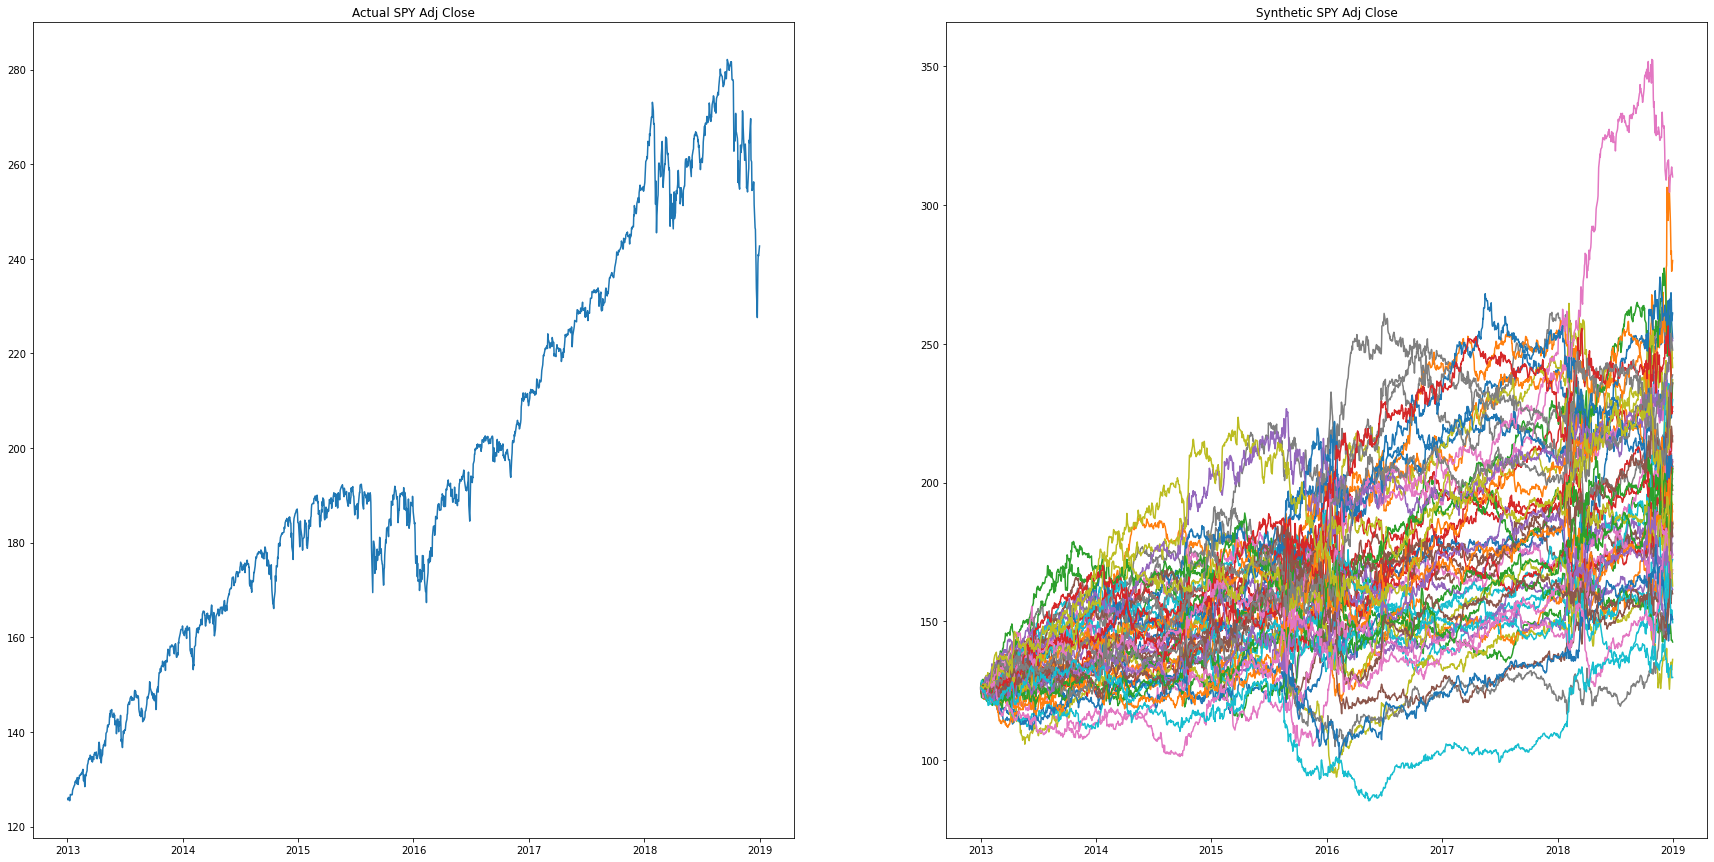

In [5]:
fig, ax = plt.subplots(1,2, figsize=(30, 15))
ax[0].set_title("Actual SPY Adj Close")
ax[1].set_title("Synthetic SPY Adj Close")
ax[0].plot(act_df_trunc["Adj_Close"]);
ax[1].plot(syn_prices_df);

## Create function for a BBAND strategy

In [6]:
def gen_bband_signals(df, lbk, band_dev):
    close_price = df.values
    u_band, l_band, m_band = ta.BBANDS(close_price, timeperiod=lbk, nbdevup=band_dev,
                                           nbdevdn=band_dev, matype=0)
    
    bb_signals = np.asarray(np.zeros(close_price.shape)).astype(float)
    for i in range(lbk, len(bb_signals) - 1):
        if close_price[i] > u_band[i]:
            bb_signals[i] = 1
        elif close_price[i] < u_band[i] and close_price[i] >= m_band[i] and bb_signals[i - 1] == 1:
            bb_signals[i] = 1
        elif close_price[i] < l_band[i]:
            bb_signals[i] = -1
        elif close_price[i] > l_band[i] and close_price[i] <= m_band[i] and bb_signals[i - 1] == -1:
            bb_signals[i] = -1
        else:
            bb_signals[i] = 0
    
    return pd.Series(bb_signals, index=df.index)    

## Create a parameter generator function

In [7]:
import itertools
def param_gen(param_list1, param_list2):
    return [params for params in itertools.product(param_list1, param_list2)]



## running strategy parameters on synthetic prices

In [8]:
def run_param_simulation(prices_df, param_list1, param_list2):
    param_sets = param_gen(param_list1, param_list2)
    mean_ret_list, stdev_list, param_list = [], [], []
    pctile_list = []
    for params in param_sets:
        strat_signals = prices_df.apply(gen_bband_signals, args = [params[0], params[1]])
        strat_returns = prices_df.pct_change(1)
        strat_perf = strat_signals.shift(2)*strat_returns
        mean_ret_list.append(strat_perf.sum(axis=0).mean())
        stdev_list.append(strat_perf.sum(axis=0).std())
        param_list.append(f"lbk={params[0]}_band={params[1]}")
        pctile_list.append(np.percentile(strat_perf.sum(axis=0), 0.1))
        
    return pd.DataFrame({"params": param_list, "mean_return":mean_ret_list, "stdev_return":stdev_list, "10_percentile_return": pctile_list})

In [9]:
syn_params_df = run_param_simulation(syn_prices_df, [10, 20, 40, 60, 125], [1, 1.5, 2, 2.5, 3])
syn_params_df.sort_values(by=["10_percentile_return"], ascending=False).head(10)

,params,mean_return,stdev_return,10_percentile_return
2,lbk=10_band=2,0.168189,0.243362,-0.373804
3,lbk=10_band=2.5,0.074159,0.299886,-0.405541
9,lbk=20_band=3,0.131040,0.320213,-0.406245
13,lbk=40_band=2.5,0.134740,0.310744,-0.407243
21,lbk=125_band=1.5,0.146656,0.291773,-0.407624
14,lbk=40_band=3,0.152151,0.304392,-0.417864
1,lbk=10_band=1.5,0.127369,0.274630,-0.419925
22,lbk=125_band=2,0.169734,0.303010,-0.435563
24,lbk=125_band=3,0.081546,0.319396,-0.460518
18,lbk=60_band=2.5,0.163161,0.310974,-0.465183


## running strategy parameters on actual prices

In [10]:
act_trunc_params_df = run_param_simulation(act_df_trunc["Adj_Close"].to_frame(), [10, 20, 40, 60, 125], [1, 1.5, 2, 2.5, 3])
act_trunc_params_df.sort_values(by=["mean_return"], ascending=False).head(10)

,params,mean_return,stdev_return,10_percentile_return
21,lbk=125_band=1.5,0.352037,NaN,0.352037
20,lbk=125_band=1,0.340561,NaN,0.340561
22,lbk=125_band=2,0.295713,NaN,0.295713
15,lbk=60_band=1,0.269968,NaN,0.269968
23,lbk=125_band=2.5,0.124201,NaN,0.124201
16,lbk=60_band=1.5,0.030204,NaN,0.030204
13,lbk=40_band=2.5,0.020785,NaN,0.020785
17,lbk=60_band=2,-0.022522,NaN,-0.022522
11,lbk=40_band=1.5,-0.038694,NaN,-0.038694
12,lbk=40_band=2,-0.104843,NaN,-0.104843


# comparing the best performing parameter sets from synthetic and actual prices

## Running Out-of-Sample performance on best parameter found on actual prices

In [11]:
import re
param_list = re.findall(r'''(\d+(?:\.\d+)*)''', act_trunc_params_df.sort_values(by=["mean_return"], ascending=False)["params"].iloc[0])
best_act_param_df = run_param_simulation(act_df_os["Adj_Close"].to_frame(), [int(param_list[0])], [float(param_list[1])])
best_act_param_df

,params,mean_return,stdev_return,10_percentile_return
0,lbk=125_band=1.5,-0.067634,NaN,-0.067634


## OS performance of parameters generated from synthetic prices (highest mean_return)

In [12]:
param_list = re.findall(r'''(\d+(?:\.\d+)*)''', syn_params_df.sort_values(by=["mean_return"], ascending=False)["params"].iloc[0])
best_mean_param_df = run_param_simulation(act_df_os["Adj_Close"].to_frame(), [int(param_list[0])], [float(param_list[1])])
best_mean_param_df

,params,mean_return,stdev_return,10_percentile_return
0,lbk=60_band=2.0,-0.025991,NaN,-0.025991


## OS performance of parameters generated from synthetic prices (lowest standard deviation with positive mean_return)

In [13]:
param_list = re.findall(r'''(\d+(?:\.\d+)*)''', syn_params_df.loc[syn_params_df["mean_return"]>=0].sort_values(by=["stdev_return"], ascending=True)["params"].iloc[0])
best_std_param_df = run_param_simulation(act_df_os["Adj_Close"].to_frame(), [int(param_list[0])], [float(param_list[1])])
best_std_param_df

,params,mean_return,stdev_return,10_percentile_return
0,lbk=10_band=2.0,0.085758,NaN,0.085758


## OS performance of parameters generated from synthetic prices (highest 10 percentile return, with positive mean_return)

In [14]:
param_list = re.findall(r'''(\d+(?:\.\d+)*)''', syn_params_df.loc[syn_params_df["mean_return"]>=0].sort_values(by=["10_percentile_return"], ascending=False)["params"].iloc[0])

best_pct_param_df = run_param_simulation(act_df_os["Adj_Close"].to_frame(), [int(param_list[0])], [float(param_list[1])])
best_pct_param_df

,params,mean_return,stdev_return,10_percentile_return
0,lbk=10_band=2.0,0.085758,NaN,0.085758


## OS performance of parameters generated from synthetic prices on best intersected parameters from mean_return, standard deviation and 10 percentile results

In [15]:
best_returns = syn_params_df.sort_values(by=["mean_return"], ascending=False).head(10)["params"]
best_stdev = syn_params_df.loc[syn_params_df["mean_return"]>=0].sort_values(by=["stdev_return"], ascending=True).head(10)["params"]
best_10_pct = syn_params_df.loc[syn_params_df["mean_return"]>=0].sort_values(by=["10_percentile_return"], ascending=False).head(10)["params"]
# best_params = best_returns.intersection(best_stdev).intersection(best_10_pct)
best_params = list(set(best_returns).intersection(set(best_stdev)).intersection(set(best_10_pct)))
best_params_perf = syn_params_df.loc[syn_params_df["params"].isin(best_params)] 

In [16]:
best_params_perf

,params,mean_return,stdev_return,10_percentile_return
2,lbk=10_band=2,0.168189,0.243362,-0.373804


In [17]:
best_act_param_df = run_param_simulation(act_df_os["Adj_Close"].to_frame(), [10], [2])
best_act_param_df

,params,mean_return,stdev_return,10_percentile_return
0,lbk=10_band=2,0.085758,NaN,0.085758


In [18]:
act_trunc_params_df = run_param_simulation(act_df_os["Adj_Close"].to_frame(), [10, 20, 40, 60, 125], [1, 1.5, 2, 2.5, 3])
act_trunc_params_df.sort_values(by=["mean_return"], ascending=False).head(10)

,params,mean_return,stdev_return,10_percentile_return
0,lbk=10_band=1,0.454387,NaN,0.454387
1,lbk=10_band=1.5,0.413941,NaN,0.413941
5,lbk=20_band=1,0.373817,NaN,0.373817
6,lbk=20_band=1.5,0.299043,NaN,0.299043
10,lbk=40_band=1,0.268990,NaN,0.268990
11,lbk=40_band=1.5,0.153262,NaN,0.153262
7,lbk=20_band=2,0.119351,NaN,0.119351
15,lbk=60_band=1,0.105884,NaN,0.105884
13,lbk=40_band=2.5,0.103046,NaN,0.103046
2,lbk=10_band=2,0.085758,NaN,0.085758
